# Read data from csv file (prep-data-lab03.csv) and fit with regression model

   day  temperature  precipitation  bicycle_counts
0    1           22            0.0             150
1    2           19            2.5              87
2    3           17            0.0             108
3    4           21            0.0             162
4    5           18            4.1              65


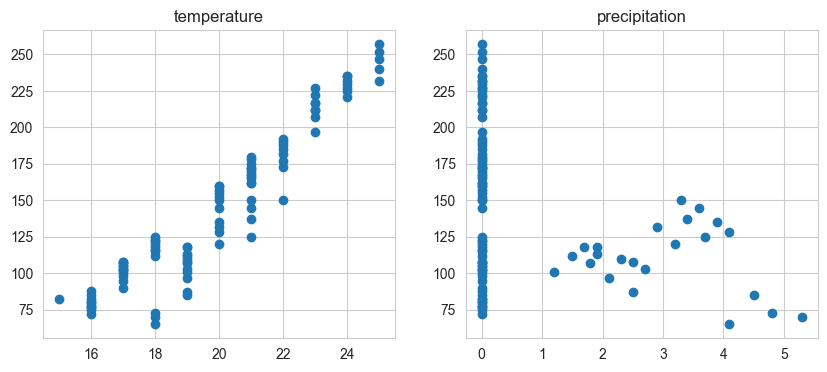

Original features:    temperature  precipitation
0           22            0.0
1           19            2.5
2           17            0.0
3           21            0.0
4           18            4.1 

New features: [[ 22.     0.   484.     0.     0.  ]
 [ 19.     2.5  361.    47.5    6.25]
 [ 17.     0.   289.     0.     0.  ]
 [ 21.     0.   441.     0.     0.  ]
 [ 18.     4.1  324.    73.8   16.81]] 

Feature ordering: ['temperature' 'precipitation' 'temperature^2' 'temperature precipitation'
 'precipitation^2']
Model coefficient: [  8.8488169  -46.86577942   0.22833109   1.56111226   1.85779679]
Model intercept: -116.39765925968345 

R Squared Error: 0.9745603601524689
y = -116.40 + 8.85(temperature) + -46.87(precipitation) + 0.23(temperature^2) + 1.56(temperature)(precipitation) + 1.86(precipitation^2)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# 1: Read data from csv file
df = pd.read_csv('data/prep-data-lab03.csv')
print(df.head())

# 2: Creating the new features
X, y = df[["temperature", "precipitation"]], df["bicycle_counts"]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].scatter(X.temperature, y)
axes[1].scatter(X.precipitation, y)
axes[0].set_title("temperature")
axes[1].set_title("precipitation")
plt.show()

# 3: Determining the degree of the polynomial
# Create a polynomial feature object with degree 2
# y = intercept + coef1(temperature) + coef2(precipitation) + coef3(temperature^2) + coef4(temperature)(precipitation) + coef5(precipitation^2)
poly = PolynomialFeatures(degree=2, include_bias=False)

# 4: Creating the new features
poly_features = poly.fit_transform(X)
print("Original features:", X[:5], "\n")
print("New features:", poly_features[:5], "\n")

# 5: Creating the polynomial regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)

# Get the order of features to understand the polynomial regression
print("Feature ordering:", poly.get_feature_names_out())

# # Get the slope and intercept of the line best fit
print("Model coefficient:", poly_reg_model.coef_,)
print("Model intercept:", poly_reg_model.intercept_, "\n")

# # Get y_pred
# # Use the training data to predict the model because we don't have the test data
# # If we have the test data, we can use it to predict the model
# # In the next module, we will learn how to split the data into training and test data
y_pred = poly_reg_model.predict(poly_features)

from sklearn.metrics import r2_score
poly_reg_r2 = r2_score(y, y_pred)
print("R Squared Error:", poly_reg_r2)

# # The final formula of the polynomial regression model
# # y = intercept + coef1(temperature) + coef2(precipitation) + coef3(temperature^2) + coef4(temperature)(precipitation) + coef5(precipitation^2)
print("y = {:.2f} + {:.2f}(temperature) + {:.2f}(precipitation) + {:.2f}(temperature^2) + {:.2f}(temperature)(precipitation) + {:.2f}(precipitation^2)".format(poly_reg_model.intercept_, poly_reg_model.coef_[0], poly_reg_model.coef_[1], poly_reg_model.coef_[2], poly_reg_model.coef_[3], poly_reg_model.coef_[4]))
